In [1]:
# numpy imports
import numpy as np
from numpy.random import randn

# pandas imports
import pandas as pd
from pandas import DataFrame, Series

# stats imports
from scipy import stats

# matplot lib imports
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn imports
import seaborn as sns

# inline plots
%matplotlib inline

In [2]:
wine_location = 'C:\Users\erroden\Documents\Python Scripts\Test Data\winequality-red.csv'

poke_location = 'C:\Users\erroden\Documents\Python Scripts\Test Data\pokemon.csv'

In [23]:
pokedata = pd.read_csv(poke_location)

pokedata['power'] = (pokedata['speed']*.5) + pokedata['attack'] + pokedata['defense']

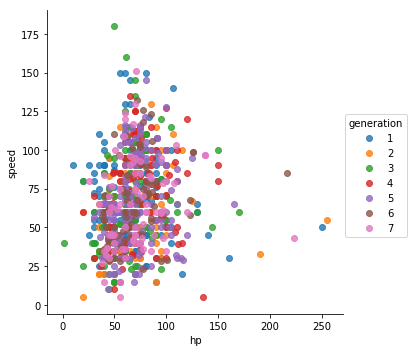

In [17]:
sns.lmplot(x='hp', y='speed', data=pokedata, fit_reg=False, hue='generation')

In [13]:
pokedata.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


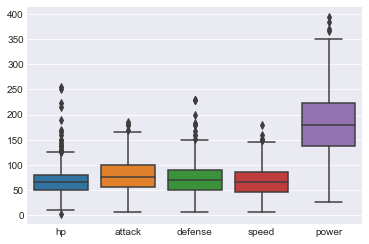

In [24]:
sns.set_style('darkgrid')

sns.boxplot(data=pokedata[['hp', 'attack', 'defense', 'speed', 'power']])

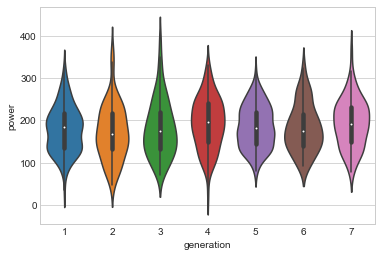

In [26]:
sns.set_style('whitegrid')

sns.violinplot(data=pokedata, x='generation', y='power')

In [28]:
pokedata.sort_values('power', ascending=False).head()[['name', 'speed', 'attack', 'defense', 'power']]

,name,speed,attack,defense,power
305,Aggron,50,140,230,395.0
382,Groudon,90,180,160,385.0
207,Steelix,30,125,230,370.0
797,Kartana,109,181,131,366.5
375,Metagross,110,145,150,350.0


In [32]:
pokedata.sort_values('attack', ascending=False).head()[['name', 'attack']]

,name,attack
213,Heracross,185
797,Kartana,181
382,Groudon,180
383,Rayquaza,180
444,Garchomp,170


In [49]:
# Helper function for getting top X of something in a group

def ranker(df, column):
    df[(column + '_rank')] = np.arange(len(df)) + 1
    return df

pokedata.sort_values('attack', ascending = False, inplace=True) #inplace makes it effect the dataframe 

pokedata = pokedata.groupby('generation').apply(ranker,'attack') # applies function 1 by 1 to each group
pokedata.head()

num_of_qual = pokedata['generation'].value_counts()

pokedata[pokedata.attack_rank<4][['name', 'attack', 'generation']].head(len(num_of_qual)*3).sort_values('generation')

,name,attack,generation
126,Pinsir,155,1
129,Gyarados,155,1
14,Beedrill,150,1
213,Heracross,185,2
247,Tyranitar,164,2
211,Scizor,150,2
382,Groudon,180,3
383,Rayquaza,180,3
353,Banette,165,3
444,Garchomp,170,4
